In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [20]:
data = pd.read_csv('datatrainfinalfinal.csv')

In [4]:
data.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID1_G', 'ID2_G', 'ID_R_G', 'ID_T',
       'DATE_G', 'Resu', 'POINT_R_1', 'POS_R_1', 'NAME_P_1', 'DATE_P_1',
       'COUNTRY_P_1', 'PROGRESS_P_1', 'POINT_P_1', 'HARDPOINT_P_1',
       'HARDTOUR_P_1', 'CLAYPOINT_P_1', 'CLAYTOUR_P_1', 'GRASSPOINT_P_1',
       'GRASSTOUR_P_1', 'CARPETPOINT_P_1', 'CARPETTOUR_P_1', 'PRIZE_P_1',
       'DR_P_1', 'DP_P_1', 'DO_P_1', 'IHARDPOINT_P_1', 'IHARDTOUR_P_1',
       'hand_1', 'height_1', 'weight_1', 'POINT_R_2', 'POS_R_2', 'NAME_P_2',
       'DATE_P_2', 'COUNTRY_P_2', 'PROGRESS_P_2', 'POINT_P_2', 'HARDPOINT_P_2',
       'HARDTOUR_P_2', 'CLAYPOINT_P_2', 'CLAYTOUR_P_2', 'GRASSPOINT_P_2',
       'GRASSTOUR_P_2', 'CARPETPOINT_P_2', 'CARPETTOUR_P_2', 'PRIZE_P_2',
       'DR_P_2', 'DP_P_2', 'DO_P_2', 'IHARDPOINT_P_2', 'IHARDTOUR_P_2',
       'hand_2', 'height_2', 'weight_2', 'NAME_T', 'ID_C_T', 'DATE_T',
       'RANK_T', 'COUNTRY_T', 'PRIZE_T', 'LATITUDE_T', 'LONGITUDE_T',
       'AGE_P_1', 'AGE_P_2'],
      dtype='objec

In [83]:
data.describe()

,Resu,POINT_R_1,POS_R_1,PROGRESS_P_1,POINT_P_1,HARDPOINT_P_1,HARDTOUR_P_1,CLAYPOINT_P_1,CLAYTOUR_P_1,GRASSPOINT_P_1,...,IHARDPOINT_P_2,IHARDTOUR_P_2,hand_2,height_2,weight_2,RANK_T,LATITUDE_T,LONGITUDE_T,AGE_P_1,AGE_P_2
count,40541.000000,40541.000000,40541.00000,40541.000000,40541.000000,40541.000000,40541.000000,40541.000000,40541.000000,40541.000000,...,40541.000000,40541.000000,40541.000000,40541.000000,40541.000000,40541.000000,40541.000000,40541.000000,40541.000000,40541.000000
mean,1.060383,769.050467,202.66064,-2.698851,832.564768,363.845532,9.448636,259.155223,9.788321,92.818260,...,69.145258,3.596095,0.946795,185.447758,79.259188,1.686416,28.808663,0.173522,31.204682,30.919440
std,0.238199,1563.058467,174.60046,24.985404,1477.048768,875.373952,5.246304,420.645954,7.004731,243.624765,...,128.710243,2.884765,0.437405,4.978067,7.598040,1.058552,26.995450,70.235140,4.184814,4.239945
min,1.000000,12.000000,1.00000,-1000.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,163.000000,0.000000,0.000000,-43.320000,-156.220000,19.000000,19.000000
25%,1.000000,165.000000,73.00000,-2.698851,190.000000,38.000000,6.000000,33.000000,5.000000,0.000000,...,0.000000,1.000000,1.000000,185.000000,75.000000,1.000000,25.170000,-64.110000,28.000000,28.000000
50%,1.000000,343.000000,157.00000,0.000000,502.000000,149.000000,9.448636,119.000000,9.000000,15.000000,...,23.000000,3.596095,1.000000,185.447758,79.259188,1.000000,39.460000,2.200000,31.000000,31.000000
75%,1.000000,685.000000,284.00000,1.000000,832.564768,363.845532,12.000000,307.000000,13.000000,92.818260,...,69.145258,5.000000,1.000000,185.447758,83.000000,2.000000,47.330000,17.110000,34.000000,34.000000
max,2.000000,16790.000000,900.00000,183.000000,14040.000000,9045.000000,40.000000,3200.000000,32.000000,2000.000000,...,1750.000000,14.000000,2.000000,208.000000,108.000000,6.000000,67.400000,174.460000,43.000000,43.000000


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40541 entries, 0 to 40540
Data columns (total 48 columns):
Resu               40541 non-null int64
POINT_R_1          40541 non-null float64
POS_R_1            40541 non-null float64
PROGRESS_P_1       40541 non-null float64
POINT_P_1          40541 non-null float64
HARDPOINT_P_1      40541 non-null float64
HARDTOUR_P_1       40541 non-null float64
CLAYPOINT_P_1      40541 non-null float64
CLAYTOUR_P_1       40541 non-null float64
GRASSPOINT_P_1     40541 non-null float64
GRASSTOUR_P_1      40541 non-null float64
CARPETPOINT_P_1    40541 non-null float64
CARPETTOUR_P_1     40541 non-null float64
PRIZE_P_1          40541 non-null float64
DR_P_1             40541 non-null float64
DP_P_1             40541 non-null float64
DO_P_1             40541 non-null float64
IHARDPOINT_P_1     40541 non-null float64
IHARDTOUR_P_1      40541 non-null float64
hand_1             40541 non-null int32
height_1           40541 non-null float64
weight_1     

In [21]:
data = data.drop(columns={'Unnamed: 0','Unnamed: 0.1', 'ID1_G', 'ID2_G', 'ID_R_G', 'ID_T', 'DATE_G','NAME_P_1','DATE_P_1','NAME_P_2','DATE_P_2','NAME_T', 'ID_C_T', 'DATE_T','PRIZE_T','COUNTRY_P_1','COUNTRY_P_2','COUNTRY_T'})

In [22]:
data['hand_1']

0        R
1        R
2        R
3        L
4        L
        ..
40536    U
40537    U
40538    R
40539    R
40540    U
Name: hand_1, Length: 40541, dtype: object

In [7]:
data.isnull().mean()*100

Resu                0.000000
POINT_R_1           0.000000
POS_R_1             0.000000
PROGRESS_P_1       12.653857
POINT_P_1          12.653857
HARDPOINT_P_1       8.467971
HARDTOUR_P_1        8.467971
CLAYPOINT_P_1       8.467971
CLAYTOUR_P_1        8.467971
GRASSPOINT_P_1      8.467971
GRASSTOUR_P_1       8.467971
CARPETPOINT_P_1     8.467971
CARPETTOUR_P_1      8.467971
PRIZE_P_1           3.702425
DR_P_1             25.852840
DP_P_1             25.852840
DO_P_1             25.852840
IHARDPOINT_P_1      8.467971
IHARDTOUR_P_1       8.467971
hand_1              0.000000
height_1           38.620162
weight_1            9.962754
POINT_R_2           0.000000
POS_R_2             0.000000
PROGRESS_P_2       18.110061
POINT_P_2          18.110061
HARDPOINT_P_2      12.071730
HARDTOUR_P_2       12.071730
CLAYPOINT_P_2      12.071730
CLAYTOUR_P_2       12.071730
GRASSPOINT_P_2     12.071730
GRASSTOUR_P_2      12.071730
CARPETPOINT_P_2    12.071730
CARPETTOUR_P_2     12.071730
PRIZE_P_2     

In [23]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder ()
data['hand_1'] = le.fit_transform (data['hand_1'])

In [24]:
data['hand_1']

0        1
1        1
2        1
3        0
4        0
        ..
40536    2
40537    2
40538    1
40539    1
40540    2
Name: hand_1, Length: 40541, dtype: int32

In [25]:
data['hand_2']

0        R
1        R
2        R
3        R
4        R
        ..
40536    R
40537    R
40538    R
40539    U
40540    R
Name: hand_2, Length: 40541, dtype: object

In [26]:
data['hand_2'] = le.fit_transform (data['hand_2'])

In [27]:
data['hand_2']

0        1
1        1
2        1
3        1
4        1
        ..
40536    1
40537    1
40538    1
40539    2
40540    1
Name: hand_2, Length: 40541, dtype: int32

In [29]:
for i in data.columns :
    data[i] = data[i].fillna (data[i].mean ())

In [30]:
data.isnull().mean()*100

Resu               0.0
POINT_R_1          0.0
POS_R_1            0.0
PROGRESS_P_1       0.0
POINT_P_1          0.0
HARDPOINT_P_1      0.0
HARDTOUR_P_1       0.0
CLAYPOINT_P_1      0.0
CLAYTOUR_P_1       0.0
GRASSPOINT_P_1     0.0
GRASSTOUR_P_1      0.0
CARPETPOINT_P_1    0.0
CARPETTOUR_P_1     0.0
PRIZE_P_1          0.0
DR_P_1             0.0
DP_P_1             0.0
DO_P_1             0.0
IHARDPOINT_P_1     0.0
IHARDTOUR_P_1      0.0
hand_1             0.0
height_1           0.0
weight_1           0.0
POINT_R_2          0.0
POS_R_2            0.0
PROGRESS_P_2       0.0
POINT_P_2          0.0
HARDPOINT_P_2      0.0
HARDTOUR_P_2       0.0
CLAYPOINT_P_2      0.0
CLAYTOUR_P_2       0.0
GRASSPOINT_P_2     0.0
GRASSTOUR_P_2      0.0
CARPETPOINT_P_2    0.0
CARPETTOUR_P_2     0.0
PRIZE_P_2          0.0
DR_P_2             0.0
DP_P_2             0.0
DO_P_2             0.0
IHARDPOINT_P_2     0.0
IHARDTOUR_P_2      0.0
hand_2             0.0
height_2           0.0
weight_2           0.0
RANK_T     

In [32]:
data.to_csv('datatrainfinalfinalfinal.csv')

In [34]:
datatrain = data.iloc[:,1:]

In [38]:
target = data.iloc[:,0]

In [41]:
data

,Resu,POINT_R_1,POS_R_1,PROGRESS_P_1,POINT_P_1,HARDPOINT_P_1,HARDTOUR_P_1,CLAYPOINT_P_1,CLAYTOUR_P_1,GRASSPOINT_P_1,...,IHARDPOINT_P_2,IHARDTOUR_P_2,hand_2,height_2,weight_2,RANK_T,LATITUDE_T,LONGITUDE_T,AGE_P_1,AGE_P_2
0,1,527.0,104.0,5.000000,878.000000,321.000000,13.000000,73.000000,6.000000,47.00000,...,32.000000,5.000000,1,185.447758,69.000000,1,41.010000,28.580000,35,30
1,1,645.0,77.0,-1.000000,502.000000,47.000000,8.000000,83.000000,6.000000,42.00000,...,32.000000,5.000000,1,185.447758,69.000000,4,40.430000,-74.000000,32,30
2,1,335.0,154.0,-2.698851,832.564768,0.000000,0.000000,40.000000,5.000000,0.00000,...,32.000000,5.000000,1,185.447758,69.000000,1,49.500000,18.170000,29,30
3,1,401.0,138.0,-1.000000,388.000000,318.000000,10.000000,43.000000,4.000000,41.00000,...,32.000000,5.000000,1,185.447758,69.000000,2,25.170000,51.320000,39,30
4,1,269.0,182.0,-2.698851,832.564768,363.845532,9.448636,259.155223,9.788321,92.81826,...,32.000000,5.000000,1,185.447758,69.000000,1,52.060000,4.170000,39,30
5,1,362.0,146.0,-6.000000,230.000000,98.000000,7.000000,111.000000,15.000000,0.00000,...,32.000000,5.000000,1,185.447758,69.000000,4,-37.490000,144.580000,32,30
6,1,306.0,172.0,2.000000,778.000000,147.000000,13.000000,56.000000,7.000000,217.00000,...,32.000000,5.000000,1,185.447758,69.000000,1,51.230000,-2.220000,35,30
7,1,422.0,131.0,-2.698851,832.564768,363.845532,9.448636,259.155223,9.788321,92.81826,...,32.000000,5.000000,1,185.447758,69.000000,1,36.480000,34.380000,30,30
8,1,463.0,125.0,-2.698851,832.564768,363.845532,9.448636,259.155223,9.788321,92.81826,...,32.000000,5.000000,1,185.447758,69.000000,1,46.340000,11.400000,33,30
9,1,463.0,125.0,-2.698851,832.564768,363.845532,9.448636,259.155223,9.788321,92.81826,...,32.000000,5.000000,1,185.447758,69.000000,1,46.340000,11.400000,33,30


In [43]:
extra_tree_forest = ExtraTreesClassifier( 
                                       )
extra_tree_forest.fit(datatrain, target) 
extra_tree_forest.feature_importances_
importance_scores = pd.DataFrame(list(zip(datatrain.columns, extra_tree_forest.feature_importances_)), columns=['feature', 'importance'])

C:\Users\aymen\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
importance_scores

,feature,importance
0,POINT_R_1,0.039710
1,POS_R_1,0.042091
2,PROGRESS_P_1,0.022111
3,POINT_P_1,0.020363
4,HARDPOINT_P_1,0.018286
5,HARDTOUR_P_1,0.022382
6,CLAYPOINT_P_1,0.020746
7,CLAYTOUR_P_1,0.021524
8,GRASSPOINT_P_1,0.014425
9,GRASSTOUR_P_1,0.015572


In [52]:
x_train,x_test,y_train,y_test=train_test_split(datatrain,target,random_state=0)

In [53]:
algorithm=DecisionTreeClassifier()
algorithm.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [89]:
y_pred=algorithm.predict(x_test)

In [55]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[9021,  456],
       [ 406,  253]], dtype=int64)

In [56]:
probs = algorithm.predict_proba(x_test)

In [57]:
accuracy_score(y_test,y_pred)

0.914956590370955

In [59]:
clf = RandomForestClassifier(bootstrap=True,n_estimators=100, max_depth=2,
                              random_state=0)

In [60]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [61]:
y_pred1=clf.predict(x_test)

In [62]:
probs1 = clf.predict_proba(x_test)

In [79]:
probs1[:,0]

array([0.94201695, 0.9413427 , 0.94248418, ..., 0.94440372, 0.94123106,
       0.94093654])

In [63]:
accuracy_score(y_test,y_pred1)

0.9349842146803473

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
classifier = KNeighborsClassifier(algorithm='ball_tree',n_neighbors=5,weights='distance')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [66]:
y_pred2 = classifier.predict(x_test)
accuracy_score(y_test,y_pred2)

0.9395224940805051

In [67]:
probs2=classifier.predict_proba(x_test)

In [73]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(x_train, y_train)

C:\Users\aymen\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred3 = logreg.predict(x_test)

In [71]:
confusion_matrix = confusion_matrix(y_test, y_pred3)
print(confusion_matrix)

[[5580 3897]
 [ 309  350]]


In [74]:
accuracy_score(y_test,y_pred3)

0.585043409629045

In [87]:
gnb = GaussianNB()

In [90]:
y_pred4 = gnb.fit(x_train, y_train).predict(x_test)

In [91]:
accuracy_score(y_test,y_pred4)

0.8970007892659826

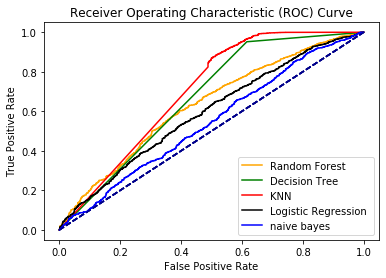

In [94]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, probs1[:,0],pos_label=1)
plt.plot(fpr1, tpr1, color='orange', label='Random Forest')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
fpr, tpr, thresholds = roc_curve(y_test, probs[:,0],pos_label=1)
plt.plot(fpr, tpr, color='green', label='Decision Tree')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
fpr2, tpr2, thresholds2 = roc_curve(y_test, probs2[:,0],pos_label=1)
plt.plot(fpr2, tpr2, color='red', label='KNN')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
fpr3, tpr3, thresholds3 = roc_curve(y_test, logreg.predict_proba(x_test)[:,0],pos_label=1)
plt.plot(fpr3, tpr3,color='black', label='Logistic Regression ')
plt.plot([0, 1], [0, 1],color='darkblue',linestyle='--')
fpr4, tpr4, thresholds4 = roc_curve(y_test, gnb.predict_proba(x_test)[:,0],pos_label=1)
plt.plot(fpr4, tpr4,color='blue', label='naive bayes ')
plt.plot([0, 1], [0, 1],color='darkblue',linestyle='--')
plt.legend()
plt.show()